<br>
<font size = 6><b>Portfolio Part 4</b></font><br>
<font size = 3><i>By Jatin Jassi.</i></font>

#### Data analysed consists of information about different behavioural factors that determines personality of a human being. The variables in the dataset, including the factors determining the personality, are as follows:

1. **Gender:** Refers to the sex of an indivisual.
2. **Age:** Refers to the age of each indivisual.
3. **Openness**: A score of one of the direct factors determining an indivisuals personality. It measures an indivisual's **willingness** to be transparent.
4. **Neuroticism**:  A score of one of the direct factors determining an indivisuals personality. It measures an indivisual's **level of abnormility** in his/her behaviour.
5. **Conscientiousness**: A score of one of the direct factors determining an indivisuals personality. It measures an indivisual's **honesty & honor** in his/her behaviour.
6. **Agreeableness:** A score of one of the direct factors determining an indivisuals personality. It measures an indivisual's **level of agreeability** in his/her behaviour.
7. **Extraversion:** A score of one of the direct factors determining an indivisuals personality. It measures an indivisual's **level of boldness & brashness** in his/her behaviour.
8. **Personality:** A final outcome based on the 5 scores considered in the analysis, concluding the personality of an indivisual. 


#### Under this analysis, following motives are set to be achieved:
1. Ensuring well-defined questions or purposes to the analysis.
2. Ensuring involvement of some data preparation and exploration.
3. Making use of at least one or more analysis/prediction techniques learned from the unit since week 7.
4. Developing some kind of visualisation of the data or results.

***Note:***
*The data is taken from Kaggle. Web address: https://www.kaggle.com/datasets/brsdincer/personality-scale-analysis*


In [80]:
#Importing the libraries needed for the solutions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import pairwise_distances
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [81]:
#Importing the data and printing the data
df = pd.read_csv('C:/Users/JJ/Desktop/portfolio-jass-j-20220820T040224Z-001/portfolio-jass-j/P4_psyc.csv')
df

,gender,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality,Num_outcome
0,Female,20,7,9,9,5,5,dependable,1
1,Male,17,5,4,5,2,4,serious,3
2,Female,25,5,5,7,2,4,serious,3
3,Female,18,6,2,7,4,7,serious,3
4,Female,19,2,4,7,1,3,responsible,5
...,...,...,...,...,...,...,...,...,...
310,Female,19,6,5,6,4,3,extraverted,2
311,Male,18,2,5,8,3,7,dependable,1
312,Male,18,7,5,6,2,7,serious,3
313,Male,23,6,7,5,4,3,extraverted,2


In [82]:
#Printing the shape of the data
print(df.shape)

(315, 9)


In [83]:
#Displaying the names of the columns
df.columns.tolist()

['gender',
 'age',
 'openness',
 'neuroticism',
 'conscientiousness',
 'agreeableness',
 'extraversion',
 'Personality',
 'Num_outcome']

In [84]:
#Displaying the types of value of each column
df.dtypes

gender               object
age                   int64
openness              int64
neuroticism           int64
conscientiousness     int64
agreeableness         int64
extraversion          int64
Personality          object
Num_outcome           int64
dtype: object

In [85]:
# Descriptive statistics of the data 
df.describe()

,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Num_outcome
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,20.244444,4.850794,4.584127,4.812698,4.844444,4.926984,2.952381
std,2.616811,1.537211,1.818623,1.786315,1.718555,1.466527,1.047116
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
50%,20.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000
75%,22.000000,6.000000,6.000000,6.000000,6.000000,6.000000,3.000000
max,28.000000,8.000000,9.000000,9.000000,8.000000,8.000000,5.000000


In [86]:
#Counting the number of missing data in each column and printing the same
df2 = df.isnull().sum()
print (df2)

gender               0
age                  0
openness             0
neuroticism          0
conscientiousness    0
agreeableness        0
extraversion         0
Personality          0
Num_outcome          0
dtype: int64


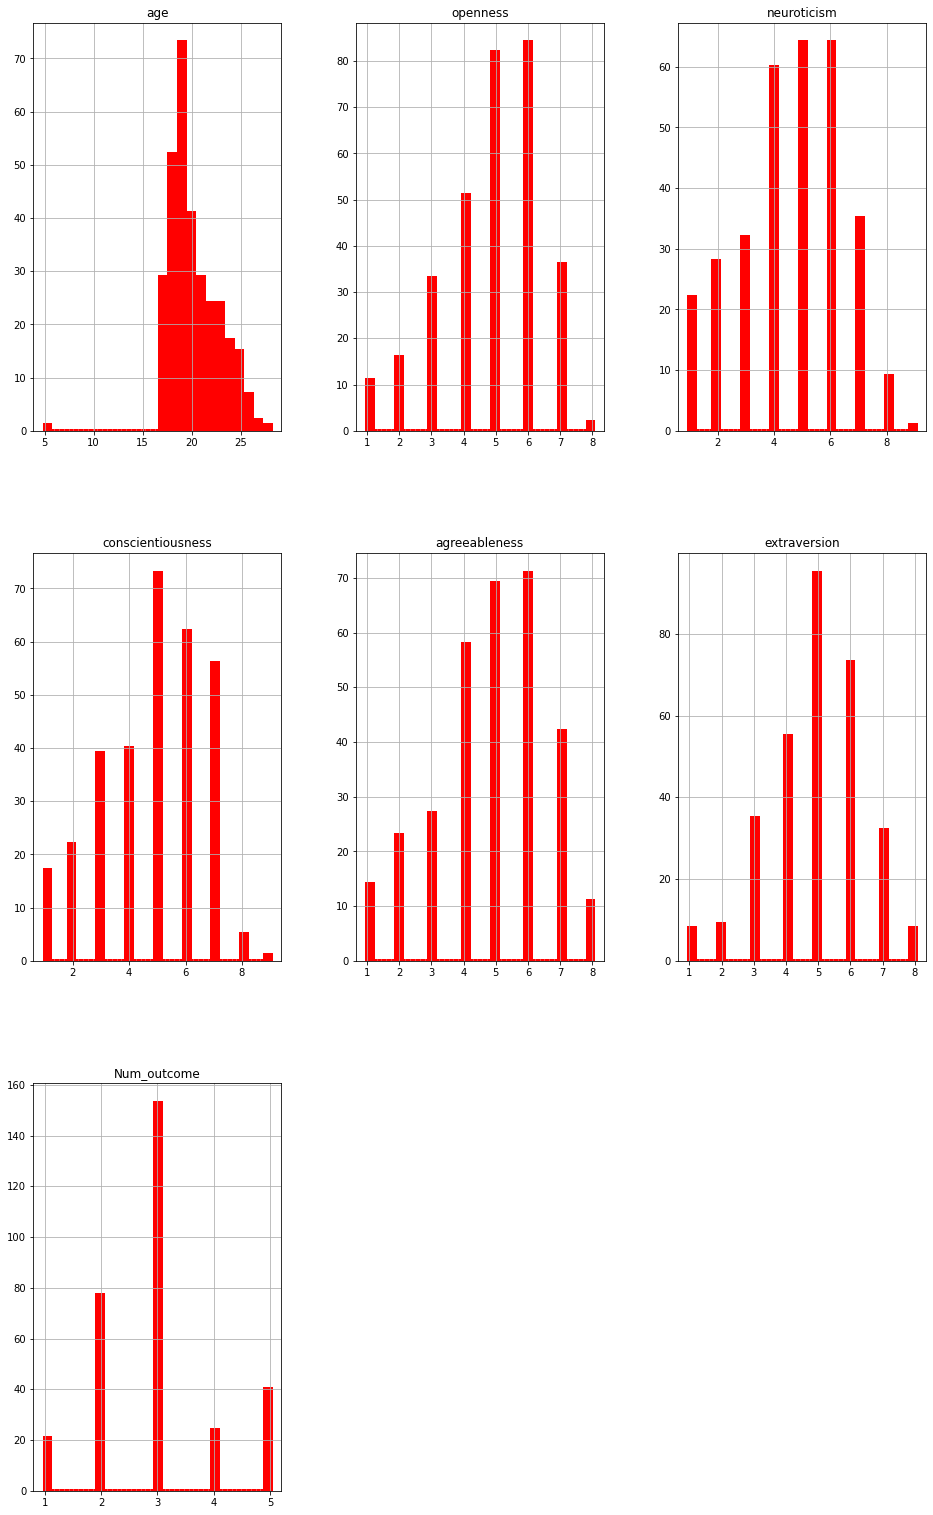

In [87]:
df.hist(bins=47, figsize=(16,27), edgecolor='red', linewidth=5)
plt.show()

In [88]:
df.corr()

,age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Num_outcome
age,1.000000,-0.089076,0.000015,-0.051491,-0.009930,-0.044296,-0.108478
openness,-0.089076,1.000000,-0.037076,0.004867,-0.046185,-0.078308,-0.125118
neuroticism,0.000015,-0.037076,1.000000,0.063195,-0.163421,0.005296,-0.314804
conscientiousness,-0.051491,0.004867,0.063195,1.000000,-0.111187,-0.115865,0.020756
agreeableness,-0.009930,-0.046185,-0.163421,-0.111187,1.000000,0.072560,-0.128012
extraversion,-0.044296,-0.078308,0.005296,-0.115865,0.072560,1.000000,-0.207586
Num_outcome,-0.108478,-0.125118,-0.314804,0.020756,-0.128012,-0.207586,1.000000


# Logistic Regression Model

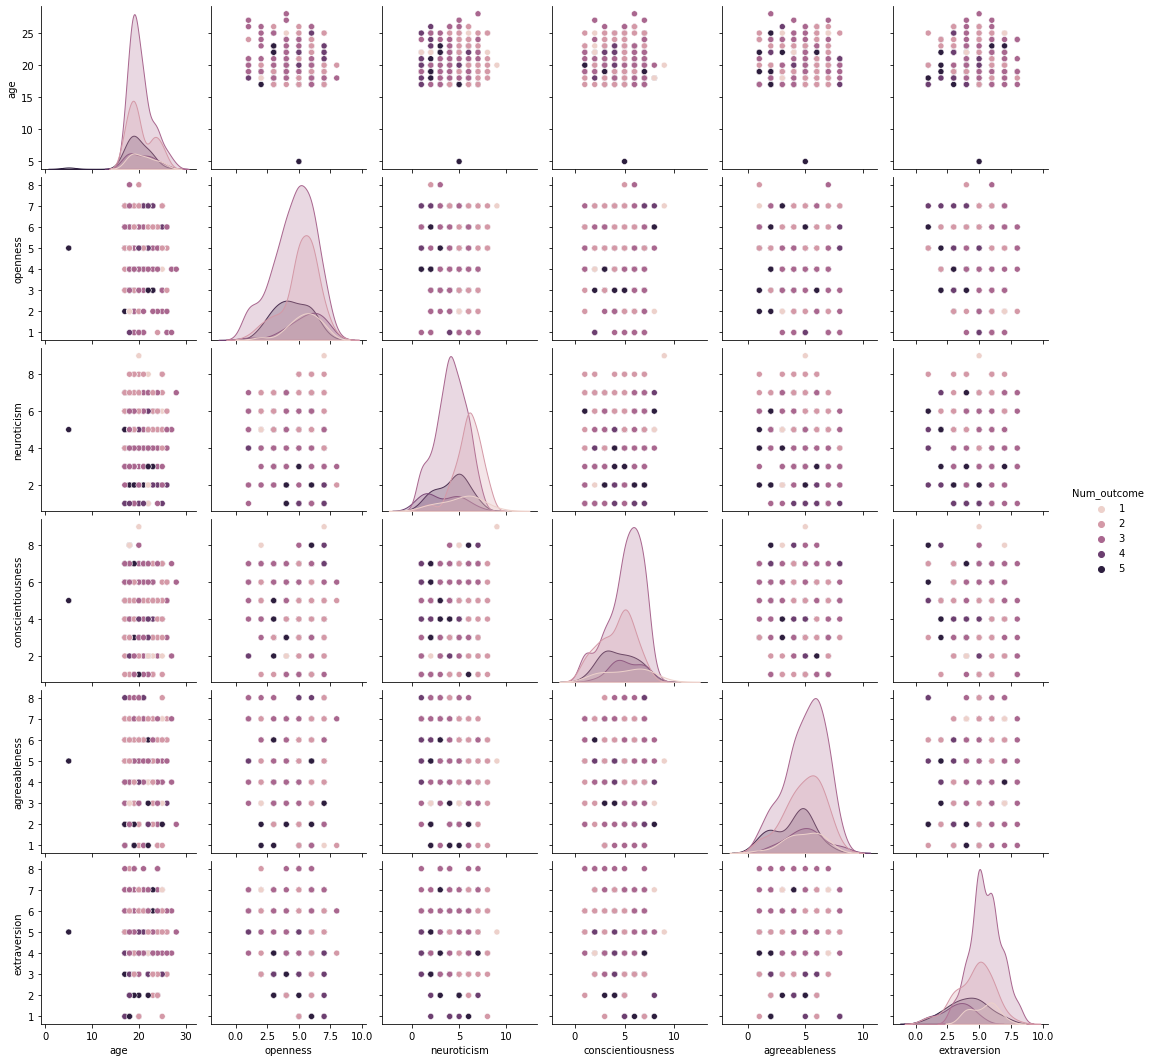

In [89]:
sns.pairplot(df, hue='Num_outcome')

In [90]:
df.drop("Num_outcome",axis = 1)
df["Num_outcome"]

0      1
1      3
2      3
3      3
4      5
      ..
310    2
311    1
312    3
313    2
314    2
Name: Num_outcome, Length: 315, dtype: int64

In [91]:
gender = df['gender'].values
vectorizer = CountVectorizer(min_df = 10)
BOW_gender = vectorizer.fit_transform(gender).toarray()

In [92]:
personality = df['Personality'].values
vectorizer = CountVectorizer(min_df = 10)
BOW_personality = vectorizer.fit_transform(personality).toarray()

In [93]:
df['gender'] = BOW_gender
df['Personality']=BOW_personality

In [94]:
#split our data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("Num_outcome",axis = 1)#predictors / all of the features 
                    ,df["Num_outcome"],#outcome/target  variable
                    test_size = 0.2,
                    stratify = df["Num_outcome"],#keep the same 0/1 ratio in both the training and testing set
                    random_state = 142 #make the result reproducible 
                )

In [95]:
#Printing the shape of the train data
X_train.shape

(252, 8)

In [96]:
#Printing the name of the columns of the train data
X_train.columns

Index(['gender', 'age', 'openness', 'neuroticism', 'conscientiousness',
       'agreeableness', 'extraversion', 'Personality'],
      dtype='object')

In [97]:
from sklearn.linear_model import LinearRegression

In [98]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [99]:
#Evaluating the model
y_test_pred = lr.predict(X_test)
y_test_pred

from sklearn.metrics import accuracy_score
x = accuracy_score(y_test, y_test_pred)
x

0.8412698412698413

# Improvising & tuning the model

In [100]:
# Taking the absolute value of the columns
abs(lr.coef_.flatten())

array([0.57903024, 0.07322376, 0.01865262, 0.0826936 , 0.01019784,
       0.08149886, 0.14193514, 3.87398136, 4.58479211, 0.06985135,
       0.18324757, 0.37939523, 0.16176583, 0.09805067, 0.01179683,
       0.55657083, 2.09758523, 0.02383552, 0.1837656 , 0.14291448,
       0.14735895, 0.06532041, 0.6310603 , 1.97995043, 0.6630897 ,
       0.10404336, 0.32349737, 0.49762981, 0.10773473, 0.12919024,
       0.6936419 , 0.37412064, 1.24508694, 0.01519623, 0.02486319,
       0.17845545, 0.08313   , 0.21106246, 0.06755671, 0.96333946])

In [101]:
#Printing the columns of the Train data
X_train.columns

Index(['gender', 'age', 'openness', 'neuroticism', 'conscientiousness',
       'agreeableness', 'extraversion', 'Personality'],
      dtype='object')

In [103]:
#Importing the RFE library 
from sklearn.feature_selection import RFE
# Applying the RFE model on the data
rfe = RFE(lr, n_features_to_select = 8)

rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=8)

In [104]:
#Displaying no of features
rfe.n_features_

8

In [105]:
#Stating whether true or false
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [106]:
#Printing the columns of the Train data
X_train.columns

Index(['gender', 'age', 'openness', 'neuroticism', 'conscientiousness',
       'agreeableness', 'extraversion', 'Personality'],
      dtype='object')

In [108]:
#Assigning the columns(predictors) to the train and test data along with the test size dimension
X_train, X_test, y_train, y_test = train_test_split(
    df[["openness", "neuroticism", "conscientiousness","agreeableness","extraversion"]], #preddictors
    df["Num_outcome"],
    stratify = df["Num_outcome"],
    test_size = 0.2,
    random_state = 7)


In [109]:
#Printing the columns of the Train data
X_train.columns

Index(['openness', 'neuroticism', 'conscientiousness', 'agreeableness',
       'extraversion'],
      dtype='object')

In [110]:
#Applying Logistic Regression model
lr = LogisticRegression().fit(X_train, y_train)

y_test_pred = lr.predict(X_test)
y = accuracy_score(y_test, y_test_pred)
y

0.6507936507936508

# Analysis - KNN Model

In [113]:
#Assigning the columns(predictors) to the train and test data along with the test size dimension
X_train,  X_test, y_train, y_test = train_test_split(df.drop("Num_outcome", axis = 1), #predictors
                 df["Num_outcome"], #outcome
                 stratify = df["Num_outcome"],
                 test_size = 0.2,
                 random_state = 7)


In [114]:
# Importing the library needed to perform KNN Model
from sklearn.neighbors import KNeighborsClassifier
# Applying the KNeighborsClassifier Model
clf = KNeighborsClassifier(n_neighbors = 5)

clf.fit(X_train, y_train)


KNeighborsClassifier()

In [115]:
#Predicting and testing the model
y_test_pred = clf.predict(X_test)
z = accuracy_score(y_test, y_test_pred)
z

0.5873015873015873

# Hyperparameter tuning

In [116]:
from sklearn.model_selection import GridSearchCV

#define search space for parameters
parameter_grid = {"n_neighbors" : range(5, 80)}

clf = KNeighborsClassifier()

clf_tune = GridSearchCV(clf,
             parameter_grid,
             scoring = "accuracy",
             cv = 5)

clf_tune.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(5, 80)}, scoring='accuracy')

In [117]:
#Obtaining the best parameter from the model
clf_tune.best_params_

{'n_neighbors': 8}

In [118]:
#Obtaing the accuracy score 
w = clf_tune.best_score_
w

0.6349803921568629

In [119]:
# Creating a new dataframe comprising all the accuracy scores
df_accuracy = pd.DataFrame({"Accuracy":[x,y,z,w]},index = ["LR","LR with improvement","KNN","HyperParameter"])
df_accuracy

,Accuracy
LR,0.841270
LR with improvement,0.650794
KNN,0.587302
HyperParameter,0.634980


<BarContainer object of 4 artists>

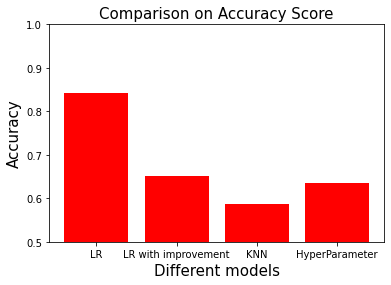

In [120]:
#Plotting the graph of the accuracy scores
plt.ylim(0.5,1.0)
plt.xlabel("Different models" , size = 15)
plt.ylabel("Accuracy", size = 15)
plt.title("Comparison on Accuracy Score", size = 15)


plt.bar(data = df_accuracy,
        height = "Accuracy",
        x = ["LR","LR with improvement","KNN","HyperParameter"],
        color = "red")

# ANALYSIS :

1. The accuracy score of the LR is the highest implying that after flattening the data it produces more productive result and help tune the model.

2. The accuracy score of the HyperParameter model is the 3rd highest and almost nearby to LRwithImprovement model.

3. The accuracy score of the KNN model is the lowest.